### IMPORTS

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
import tensorflow_hub as hub

import cv2
import os
print(os.listdir("../input"))

['flowerdataset']


### LOAD DATA

In [2]:
train_df = pd.read_csv("../input/flowerdataset/flowerDataset/flowers17_training.csv", header=None)

In [3]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
0,snowdrop,5,5,30,9,11,33,1,0,14,...,76,47,62,88,40,43,66,62,93,90
1,windflower,51,63,51,27,39,27,14,25,17,...,127,129,161,126,116,155,113,99,143,95
2,tigerlily,202,221,208,70,97,97,152,169,174,...,81,24,93,39,4,34,16,60,146,81
3,tigerlily,15,27,16,15,26,9,2,21,2,...,4,3,16,0,4,18,0,17,24,15
4,windflower,6,10,11,6,10,11,6,10,11,...,0,0,4,3,0,49,35,1,9,5


In [4]:
y_train = train_df[0]
X_train = train_df.drop(columns=[0])

### VISUALIZE DATA

In [5]:
def get_sample_images(X_train, y_train):
    image_data = []
    labels = []
    print("Loading images for: ", end =" ")
    samples = np.random.choice(len(X_train), 16)
    for sample in samples:
        print("{} |".format(y_train.iloc[sample]), end=" ")
        img = X_train.iloc[sample].values.reshape((64,64,3))
        img = np.flip(img, 2)
        image_data.append(img)
        labels.append(y_train.iloc[sample])
        
    return np.array(image_data), labels

In [6]:
images, labels = get_sample_images(X_train, y_train)

Loading images for:  dandelion | dandelion | fritillary | iris | tigerlily | buttercup | snowdrop | fritillary | windflower | snowdrop | sunflower | daffodil | tulip | daisy | bluebell | snowdrop | 

In [7]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: print('Serial title'); titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image, cmap=None)
        a.set_title(title, fontsize=50)
        a.grid(False)
        a.axis("off")
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()

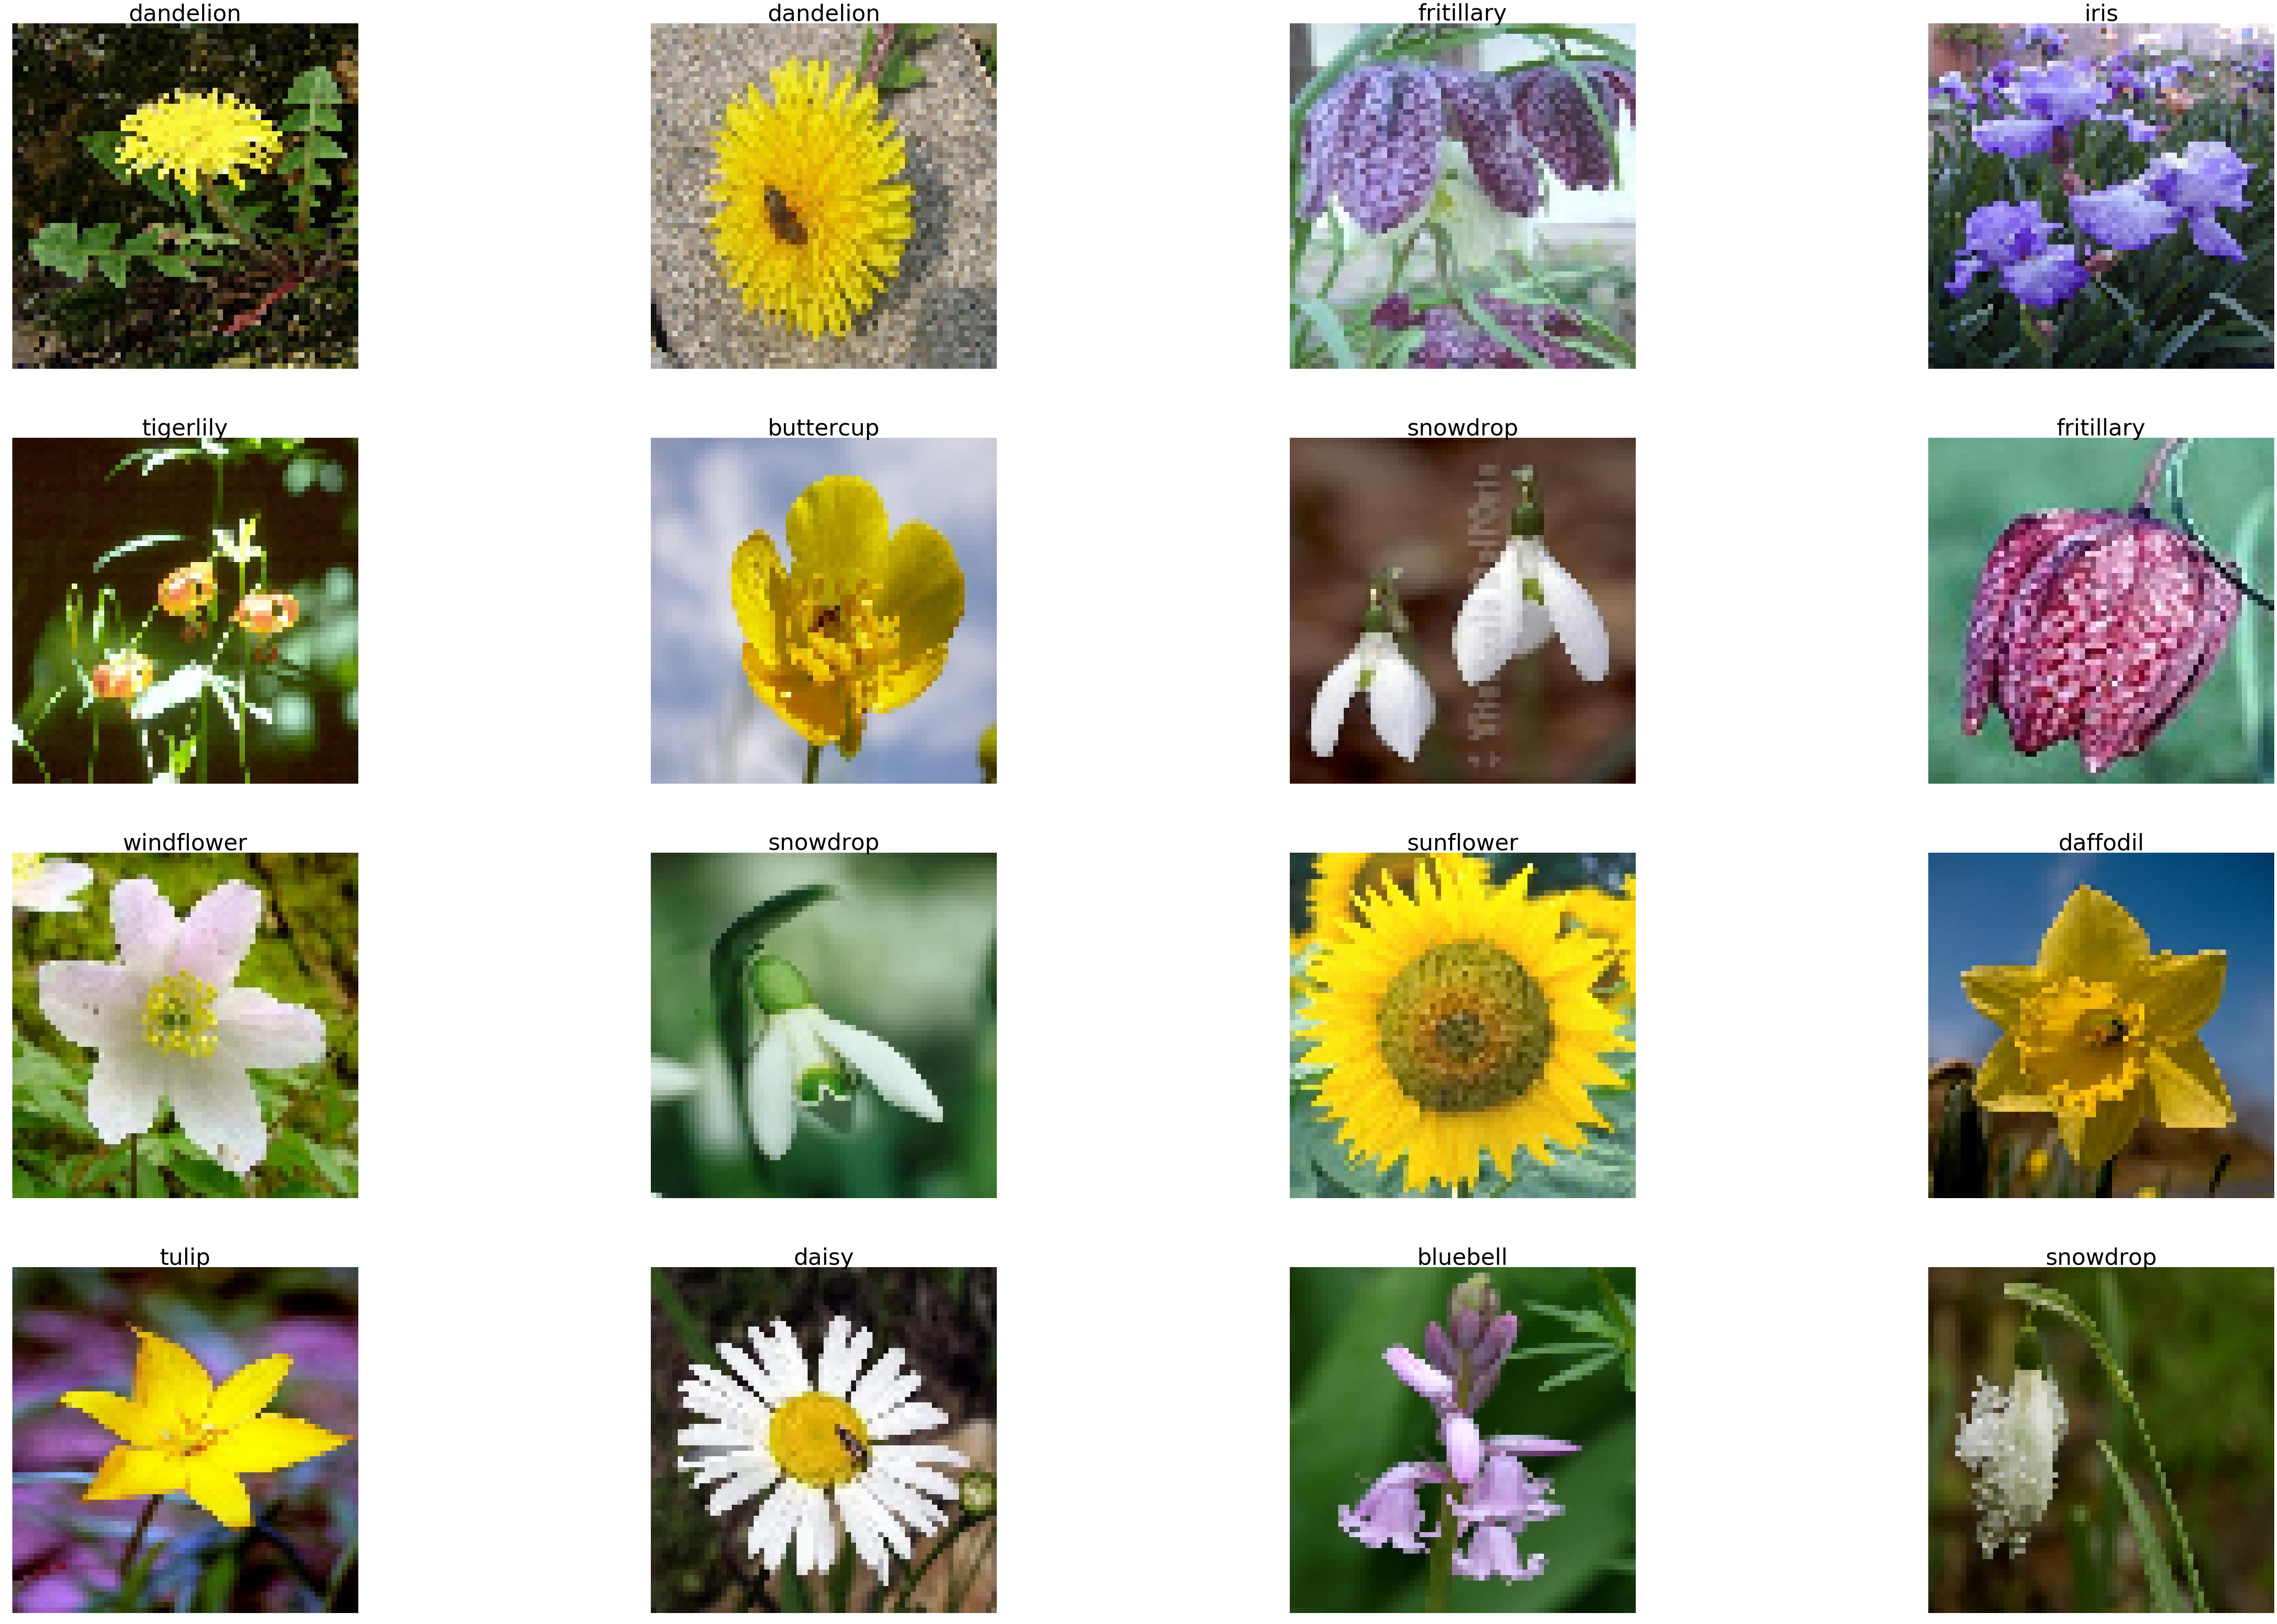

In [8]:
show_images(images, 4, titles=labels)

### Model

In [9]:
model = hub.load("https://github.com/captain-pool/GSOC/releases/download/1.0.0/esrgan.tar.gz")

In [10]:
init = tf.global_variables_initializer()

### RUN SESSION

In [11]:
super_res = []
with tf.Session() as sess:
    sess.run(init)
    super_res.append(model.call(images).eval())
    fake_img = tf.cast(tf.clip_by_value(super_res[0], 0, 255), tf.uint8).eval()

In [12]:
fake_img.shape

(16, 256, 256, 3)

### SUPER RESOLUTION IMAGES

It's working :D 

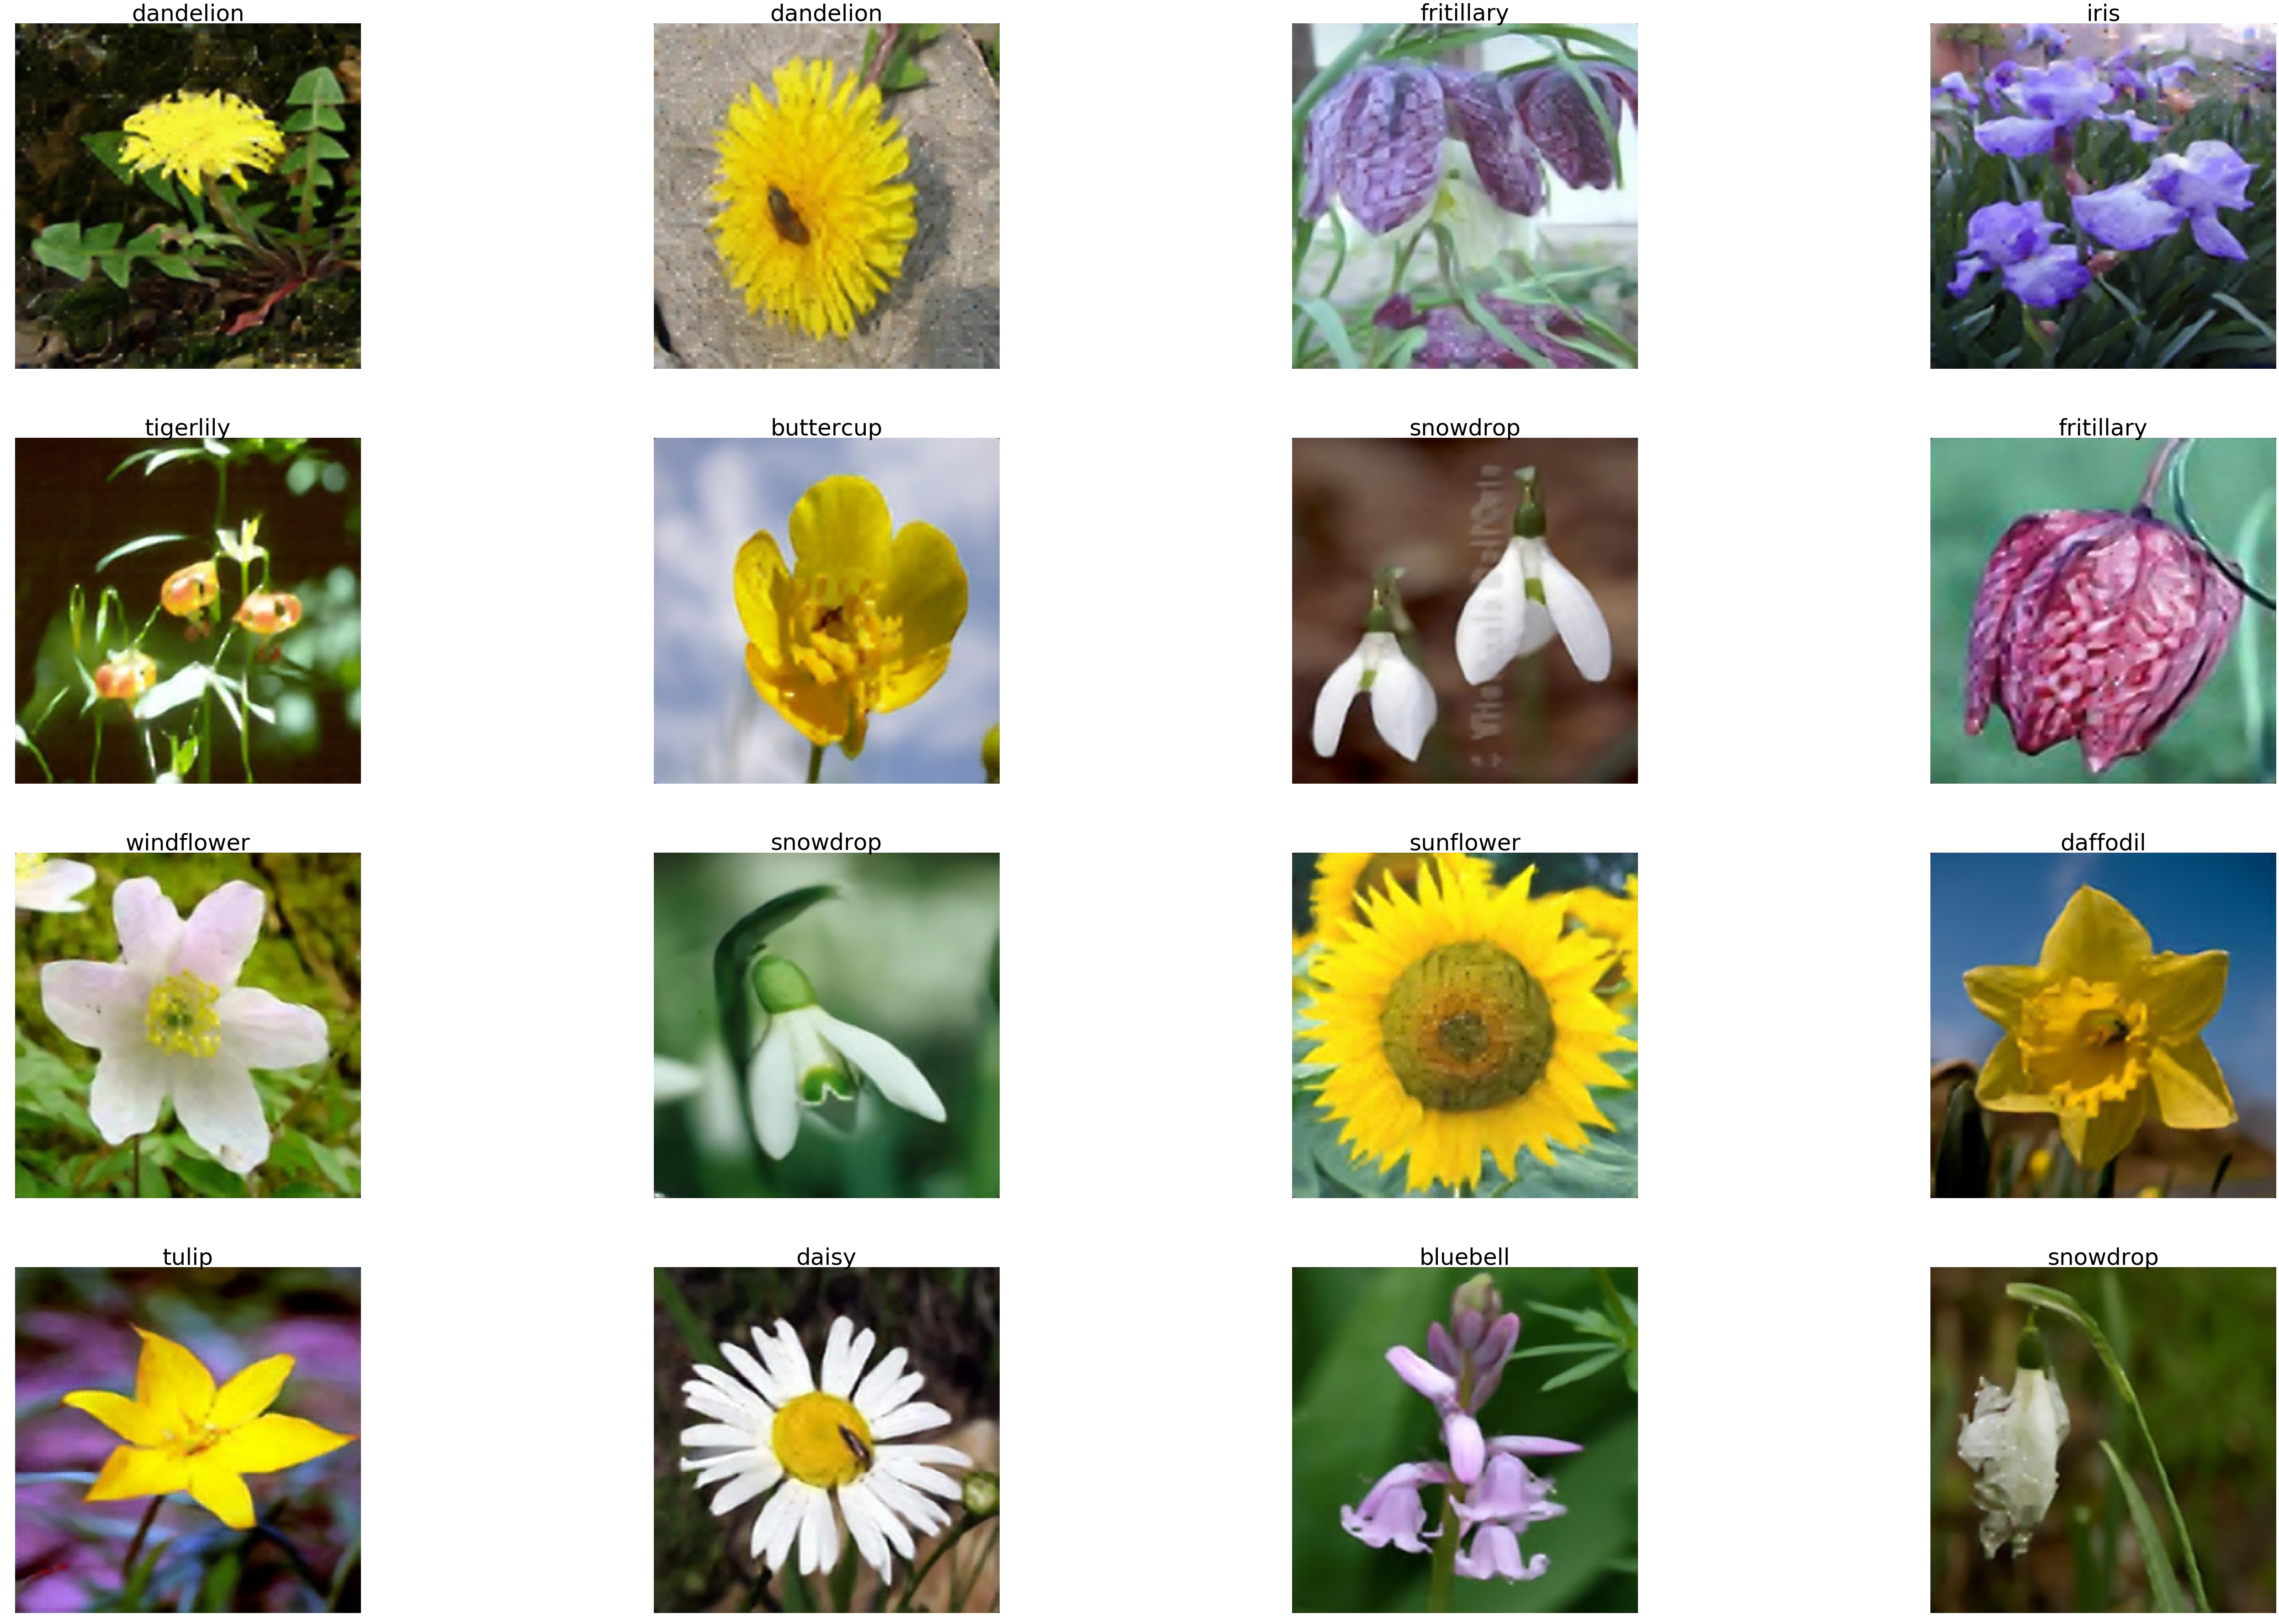

In [13]:
show_images(images=fake_img, cols=4, titles=labels)